**Loading Libraries**

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix



In [68]:

data = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv",encoding="latin-1")
print(data.head())


     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


**Data Loading and Preprocessing**

In [69]:

data = data[['v1', 'v2']]
data.columns = ['label', 'text']
data['label'] = data['label'].map({'ham': 0, 'spam': 1})
data['text'] = data['text'].str.replace(r'\d+', '')  
data['text'] = data['text'].str.replace(r'[^\w\s]', '')


X = data['text']
y = data['label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vec = tfidf_vectorizer.fit_transform(X_train)
X_test_vec = tfidf_vectorizer.transform(X_test)


**Model Training with Naive Bayes**

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       1.00      0.79      0.88       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



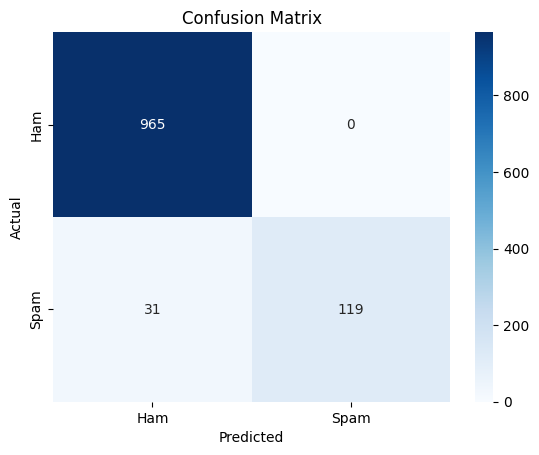

In [70]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model = MultinomialNB()
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**Applying SMOTE for Class Imbalance**

SMOTE results:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       965
           1       0.85      0.92      0.88       150

    accuracy                           0.97      1115
   macro avg       0.92      0.95      0.93      1115
weighted avg       0.97      0.97      0.97      1115



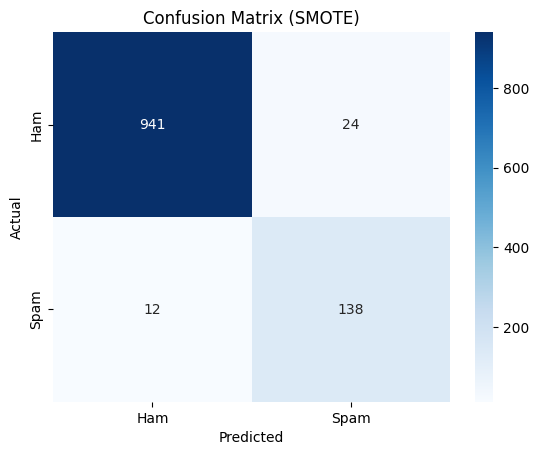

In [71]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_vec, y_train)

model.fit(X_train_res, y_train_res)
y_pred_res = model.predict(X_test_vec)

print("SMOTE results:\n", classification_report(y_test, y_pred_res))

cm_res = confusion_matrix(y_test, y_pred_res)
sns.heatmap(cm_res, annot=True, fmt='d', cmap='Blues', xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (SMOTE)')
plt.show()


**Machine Learning Models**

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


log_model = LogisticRegression()
log_model.fit(X_train_vec, y_train)
log_y_pred = log_model.predict(X_test_vec)
print("Logistic Regression:\n", classification_report(y_test, log_y_pred))

rf_model = RandomForestClassifier()
rf_model.fit(X_train_vec, y_train)
rf_y_pred = rf_model.predict(X_test_vec)
print("Random Forest:\n", classification_report(y_test, rf_y_pred))


Logistic Regression:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       0.97      0.71      0.82       150

    accuracy                           0.96      1115
   macro avg       0.96      0.85      0.90      1115
weighted avg       0.96      0.96      0.95      1115

Random Forest:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       0.99      0.82      0.90       150

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115



**LSTM Model Training(Deep Learning)**

In [74]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
from keras.preprocessing.sequence import pad_sequences

max_features = 5000
maxlen = 200

X_train_pad = pad_sequences(X_train_vec.toarray(), maxlen=maxlen)
X_test_pad = pad_sequences(X_test_vec.toarray(), maxlen=maxlen)

model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test), verbose=2)

y_pred_lstm = model.predict(X_test_pad)
y_pred_lstm = (y_pred_lstm > 0.5)

print("LSTM Model Result:\n", classification_report(y_test, y_pred_lstm))


Epoch 1/5
70/70 - 20s - 288ms/step - accuracy: 0.8551 - loss: 0.4131 - val_accuracy: 0.8655 - val_loss: 0.3949
Epoch 2/5
70/70 - 17s - 244ms/step - accuracy: 0.8661 - loss: 0.3979 - val_accuracy: 0.8655 - val_loss: 0.3952
Epoch 3/5
70/70 - 17s - 248ms/step - accuracy: 0.8661 - loss: 0.3950 - val_accuracy: 0.8655 - val_loss: 0.3951
Epoch 4/5
70/70 - 17s - 246ms/step - accuracy: 0.8661 - loss: 0.3951 - val_accuracy: 0.8655 - val_loss: 0.3951
Epoch 5/5
70/70 - 17s - 244ms/step - accuracy: 0.8661 - loss: 0.3958 - val_accuracy: 0.8655 - val_loss: 0.3963
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step
LSTM Model Result:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       965
           1       0.00      0.00      0.00       150

    accuracy                           0.87      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.75      0.87      0.80      1115



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Hyperparameter Optimization with GridSearchCV**

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

parameters = {
    'vectorizer__max_features': [1000, 5000, 10000],
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    'classifier__alpha': [0.1, 0.5, 1]
}

pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', MultinomialNB())
])

grid_search = GridSearchCV(pipeline, parameters, cv=3, n_jobs=-1, verbose=3)
grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)

y_pred_best = grid_search.predict(X_test)
print("Optimization Result:\n", classification_report(y_test, y_pred_best))


Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Parameters:  {'classifier__alpha': 0.1, 'vectorizer__max_features': 10000, 'vectorizer__ngram_range': (1, 2)}
Optimization Result:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.89      0.93       150

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

